In [4]:
# files paths
file_path = "drive-download-20230904T135232Z-004/Greenland26X_22W_Sentinel2_2019-06-19_20.tif"
file_path1 = "drive-download-20230904T135232Z-004/Greenland26X_22W_Sentinel2_2019-06-03_05.tif"
file_path2 = "drive-download-20230904T135232Z-004/Greenland26X_22W_Sentinel2_2019-07-31_25.tif"
file_path3 = "drive-download-20230904T135232Z-004/Greenland26X_22W_Sentinel2_2019-08-25_29.tif"
polygons_file = "drive-download-20230904T135232Z-004\lake_polygons_training.gpkg"
lakes_train_test = "drive-download-20230904T135232Z-004\lakes_regions.gpkg"


In [18]:
len(image_names)

4

In [20]:
import pathlib
import os 
# open files
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gp

IMAGE_DIR = pathlib.Path("downloads")
image_names = [name for name in os.listdir(IMAGE_DIR) if name.split(".")[-1] == "tif"]
file_path = [IMAGE_DIR / n for n in image_names]
polygons_file = IMAGE_DIR / "lake_polygons_training.gpkg"
lakes_train_test = IMAGE_DIR / "lakes_regions.gpkg"

imgs = [rasterio.open(f) for f in file_path]
lakes_poly = gp.read_file(polygons_file)
regions = gp.read_file(lakes_train_test)

In [17]:
# open files
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gp

# tif files
img = rasterio.open(file_path)
img1 = rasterio.open(file_path1)
img2 = rasterio.open(file_path2)
img3 = rasterio.open(file_path3)
# geopackage files
lakes_poly = gp.read_file(polygons_file)
regions = gp.read_file(lakes_train_test)

RasterioIOError: drive-download-20230904T135232Z-004/Greenland26X_22W_Sentinel2_2019-06-03_05.tif: No such file or directory

<Axes: >

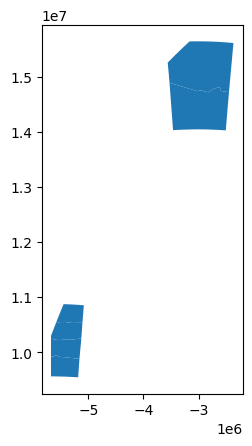

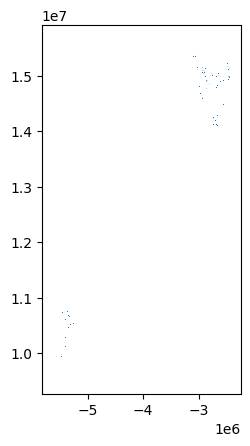

In [21]:
# to plot regions
regions.plot()
# to plot lakes
lakes_poly.plot()

In [33]:
def from_tif_to_tensor(image):

    image_array = image.read()
    torch_image = ToTensor()(image_array)
    return torch_image

In [24]:
from matplotlib import pyplot

def plot_image(image):
    pyplot.clf()
    image_array = image.read()
    image_array = np.transpose(image_array, (1, 2, 0))
    pyplot.imshow(image_array)
    pyplot.show()


In [15]:
# parte scritta da Giulia 
# to create a cropped image and save it as tif image
import random
from rasterio.windows import Window

# to cut a tif image
# The size in pixels of your desired window
xsize, ysize = 1024, 1024

# Generate a random window origin (upper left) that ensures the window 
# doesn't go outside the image. i.e. origin can only be between 
# 0 and image width or height less the window width or height
xmin, xmax = 0, image.width - xsize
ymin, ymax = 0, image.height - ysize
xoff, yoff = 50500, 100000

# Create a Window and calculate the transform from the source dataset    
window = Window(xoff, yoff, xsize, ysize)
transform = image.window_transform(window)

# Create a new cropped raster to write to
profile = image.profile
profile.update({
    'height': xsize,
    'width': ysize,
    'transform': transform})

with rasterio.open('output4.tif', 'w', **profile) as dst:
    # Read the data from the window and write it to the output raster
    dst.write(image.read(window=window))

NameError: name 'image' is not defined

In [26]:
#CROP per generare le immagini da trainare 
# to create a cropped image and save it as tif image
import random
from rasterio.windows import Window

# to cut a tif image
# The size in pixels of your desired window
xsize, ysize = 224, 224

i = 0

for img in imgs:
    # Generate a random window origin (upper left) that ensures the window 
    # doesn't go outside the image. i.e. origin can only be between 
    # 0 and image width or height less the window width or height
    xmin, xmax = 0, img.width - xsize
    ymin, ymax = 0, img.height - ysize
    for xoff in range(0, xmax, xsize):
        for yoff in range(0, ymax, ysize):

            # Create a Window and calculate the transform from the source dataset    
            window = Window(xoff, yoff, xsize, ysize)
            transform = img.window_transform(window)

            # Create a new cropped raster to write to
            profile = img.profile
            profile.update({
                'height': xsize,
                'width': ysize,
                'transform': transform})

            with rasterio.open(f'output{i}.tif', 'w', **profile) as dst:
                # Read the data from the window and write it to the output raster
                dst.write(img.read(window=window))
            
            i += 1

KeyboardInterrupt: 